# Validation of PC-TAU histogram data extraction

This notebook shows that the PC-TAU histogram data used to create the histogram plots of the 12 Weather States has been extracted properly.
The plots and data can be found at the following link: <https://www.noaacrest.org/rscg/Products/WS/glcluster.html>

This is important to show because the Weather State of a gridbox in the HGG dataset will be determined by the smallest euclidean distance calculated against these PC-TAU histograms (gridboxes are PC-TAU histograms of the same shape).

In [1]:
import os
import netCDF4
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib

# Load and Plot Data 

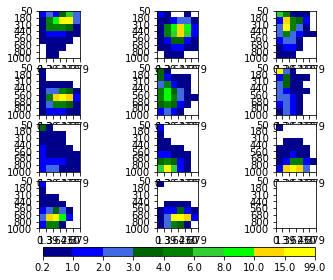

In [2]:
# Load data from txt file directly downloaded from the above webiste
pctau_list = np.loadtxt(os.getcwd()+'/'+'pctau.txt').reshape(12, 7, 6)

# Create similar colorbar to original
colors = ['darkblue', 'b', 'royalblue', 'darkgreen', 
          'green', 'limegreen', 'lime','gold', 'yellow']
bounds = [.2, 1, 2, 3, 4, 6, 8, 10, 15, 99]
norm = mpl.colors.BoundaryNorm(bounds, len(colors))
cmap = mpl.colors.ListedColormap(colors)

# Use for moving tick marks to match those on original plots
xticks = np.arange(-.5, 6, 1)
xtick_labels = ['0', '1.3', '3.6', '9.4', '23', '60', '379']
yticks = np.arange(-.5, 7, 1)
ytick_labels = ['50', '180', '310', '440', '560',
                '680', '800', '1000']

fig, axes = plt.subplots(ncols=3, nrows=4)
cax = fig.add_axes([.2, .03, .63, .03])
for i, ax in enumerate(axes.flatten()):
    plot_data = np.ma.masked_where(pctau_list[i,:,:]<.2, pctau_list[i,:,:])
    im = ax.imshow(plot_data, norm=norm, cmap=cmap)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()